## Lectures catalogues SDSS et ROSAT
Il va falloir passer des fichiers .fit à des dataframes pour pouvoir les manipuler par la suite.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import math as m 

Fonction pour passer de .fit à un dataframe (REMARQUUE : Le programme ne semble pas fonctionner pour certains fits binary → dans le doute télécharger des fits ascii) : 

In [2]:
def fits_to_dataframe(fits_file):
    with fits.open(fits_file) as hdul:
        data = hdul[1].data # Assuming the data is in the first extension
        df = pd.DataFrame(data)
    return df


On précise le chemin menant à chacun des catalogues :

In [3]:
path_X = 'SDSS_ROSAT/ROSAT_vikhlinin_98.fit'
name_X = 'ROSAT_vikhlinin_98'

path_opt = 'SDSS_ROSAT/Wen_2012_SDSS_ascii.fit'
name_opt = 'Wen_2012_SDSS'

On les convertit en dataframe et on affiche leur structure :

In [4]:
X_df = fits_to_dataframe(path_X)
X_nb_clusters = X_df.shape[0]
X_df

,_Glon,_Glat,_RAJ2000,_DEJ2000,__VMF98_,RAJ2000,DEJ2000,FX,e_FX,Rc,e_Rc,z,detFlag,Note
0,117.120151,-36.330684,7.638333,26.305278,1,00 30 33.2,+26 18 19,24.3,3.0,31,3,0.50,,0
1,88.615715,-85.827772,10.292917,-23.659167,2,00 41 10.3,-23 39 33,9.8,2.4,25,12,0.15,,0
2,122.564764,-72.358094,12.746667,-9.486667,3,00 50 59.2,-09 29 12,36.6,4.9,45,4,0.21,,0
3,278.665813,-88.603951,13.511667,-28.399444,4,00 54 02.8,-28 23 58,10.8,1.5,37,6,0.25,,0
4,137.517149,-84.946862,14.232500,-22.231389,5,00 56 55.8,-22 13 53,25.9,5.2,61,12,0.11,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,94.930743,-43.448450,352.207917,14.886667,219,23 28 49.9,+14 53 12,7.6,1.7,27,12,0.49,,0
219,355.416709,-70.183152,352.967083,-37.786389,220,23 31 52.1,-37 47 11,10.8,4.7,46,25,0.26,,0
220,12.244639,-75.747516,357.223750,-31.288889,221,23 48 53.7,-31 17 20,32.5,5.1,43,8,0.21,,39
221,11.862211,-75.776243,357.281667,-31.373889,222,23 49 07.6,-31 22 26,6.0,1.4,21,6,0.00,F,0


In [5]:
# Les clusters confirmés (il y a tout de même un AGN dans ce dataframe, voire remarque partir 5.1 de Vikhlinin 98  : 
# "One object, identified with an AGN, was considered as a false detection but was left in the catalog for statistical completeness.")
X_df_confirmed = X_df[(X_df['detFlag']!= 'U') & 
                      (X_df['detFlag']!= 'F')]
indices_confirmed= X_df_confirmed.index.tolist()


In [6]:
X_df_confirmed
indices_list = X_df_confirmed.index.tolist()


In [7]:
opt_df = fits_to_dataframe(path_opt)
opt_nb_clusters = opt_df.shape[0]
opt_df

,_Glon,_Glat,_RAJ2000,_DEJ2000,WHL,RAJ2000,DEJ2000,zph,zsp,rmag,r200,RL_,N200,Other
0,110.449770,-29.412918,0.00236,32.20925,J000000.6+321233,0.00236,32.20925,0.1274,0.0000,14.92,1.72,70.63,24,Abell \r
1,100.049559,-55.283431,0.00957,5.28827,J000002.3+051718,0.00957,5.28827,0.1696,0.0000,16.20,0.94,17.48,9,\r
2,110.203228,-30.366812,0.01377,31.23175,J000003.3+311354,0.01377,31.23175,0.5428,0.0000,20.17,0.87,14.27,8,\r
3,110.350581,-29.827793,0.01475,31.78564,J000003.5+314708,0.01475,31.78564,0.0932,0.0000,15.18,0.94,16.97,9,\r
4,98.226082,-57.913027,0.01945,2.47386,J000004.7+022826,0.01945,2.47386,0.4179,0.0000,19.32,0.95,13.71,10,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132679,107.667888,-38.665737,359.98712,22.67506,J235956.9+224030,359.98712,22.67506,0.3590,0.0000,18.27,1.00,19.46,11,\r
132680,104.152271,-47.689671,359.99329,13.29671,J235958.4+131748,359.99329,13.29671,0.1710,0.0000,16.57,0.91,14.23,11,\r
132681,96.879786,-59.541787,359.99500,0.70175,J235958.8+004206,359.99500,0.70175,0.0741,0.0817,14.89,1.01,19.64,11,AMF \r
132682,107.386151,-39.528437,359.99677,21.78513,J235959.2+214706,359.99677,21.78513,0.4303,0.0000,18.90,1.00,19.17,11,\r


In [8]:
X_df['_Glon'][150:200]

150    332.583178
151    114.818499
152     42.075005
153     42.270168
154    105.818179
155    105.747169
156     14.857409
157     84.573212
158     32.154128
159    352.375967
160    352.489719
161    352.598806
162     77.049062
163    105.623419
164    104.329526
165     31.183822
166     31.638337
167     72.384634
168     72.497985
169     14.924724
170     20.045019
171     24.286421
172     85.143801
173     33.968067
174     33.466369
175     39.482554
176     32.886365
177     38.851387
178     42.916082
179     38.936356
180     86.698158
181     81.999964
182    115.602577
183     63.722161
184     63.679193
185     63.169108
186     57.140026
187     56.783427
188     94.426191
189     94.430481
190     94.561869
191     94.523845
192     66.051990
193    106.069700
194     99.053413
195    341.897813
196    341.767473
197    341.587000
198    358.503970
199     44.904027
Name: _Glon, dtype: float64

## Data manipulation :

### Histogrammes de nombres de clusters en fonction de z :

    X

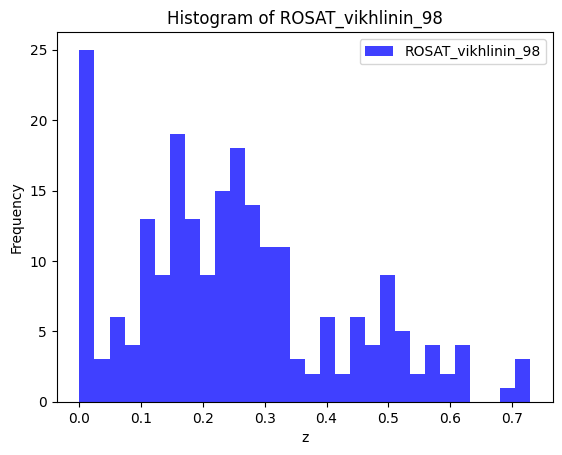

In [9]:
plt.hist(X_df['z'], bins=30, alpha=0.75, label=name_X, color='blue')
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title(f'Histogram of {name_X}')
plt.legend()
plt.show()

    Optical

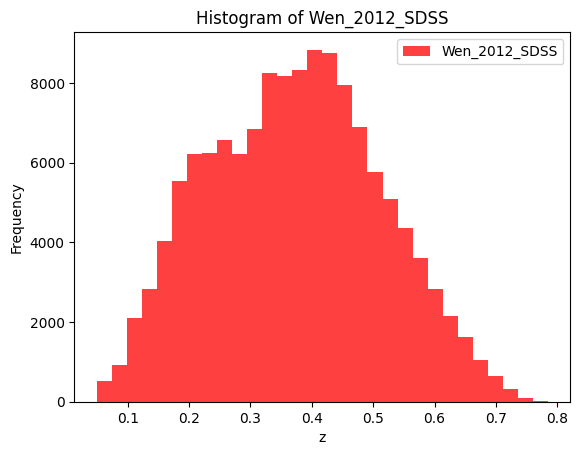

In [10]:
plt.hist(opt_df['zph'], bins=30, alpha=0.75, label=name_opt, color='red')
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title(f'Histogram of {name_opt}')
plt.legend()
plt.show()

    Superpostion of Optical and X

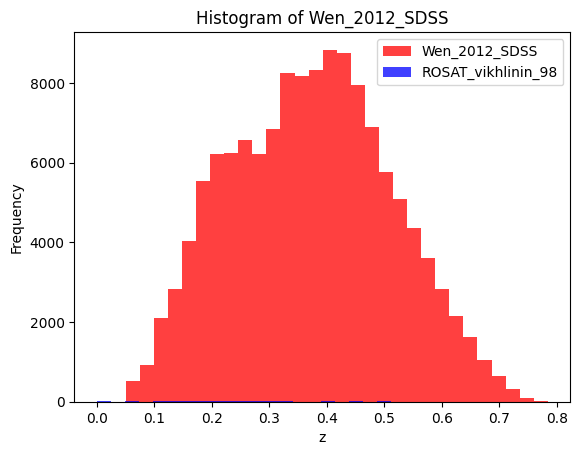

In [11]:
plt.hist(opt_df['zph'], bins=30, alpha=0.75, label=name_opt, color='red')
plt.hist(X_df['z'], bins=30, alpha=0.75, label=name_X, color='blue')
plt.xlabel('z')
plt.ylabel('Frequency')
plt.title(f'Histogram of {name_opt}')
plt.legend()
plt.show()

### "Footprint" et projection dans le plan galactique des clusters :

    X

In [12]:
X_glon_deg = np.array(X_df['_Glon'] -180)
X_glon_radians = np.radians(X_glon_deg)

X_glat_radians = np.radians(X_df['_Glat'])

X_confirmed_glon_deg = np.array(X_df_confirmed['_Glon'] -180)
X_confirmed_glon_radians = np.radians(X_confirmed_glon_deg)

X_confirmed_glat_radians = np.radians(X_df_confirmed['_Glat'])



In [13]:
"""left_x_axis = np.arange(180,0-0.01,-0.1)
right_x_axis = np.arange(360,180-0.1,-0.1)
x_axis = np.concatenate((left_x_axis, right_x_axis))"""

'left_x_axis = np.arange(180,0-0.01,-0.1)\nright_x_axis = np.arange(360,180-0.1,-0.1)\nx_axis = np.concatenate((left_x_axis, right_x_axis))'

Text(0.5, 1.0, 'Sky Map of ROSAT_vikhlinin_98 Clusters in Galactic Coordinates')

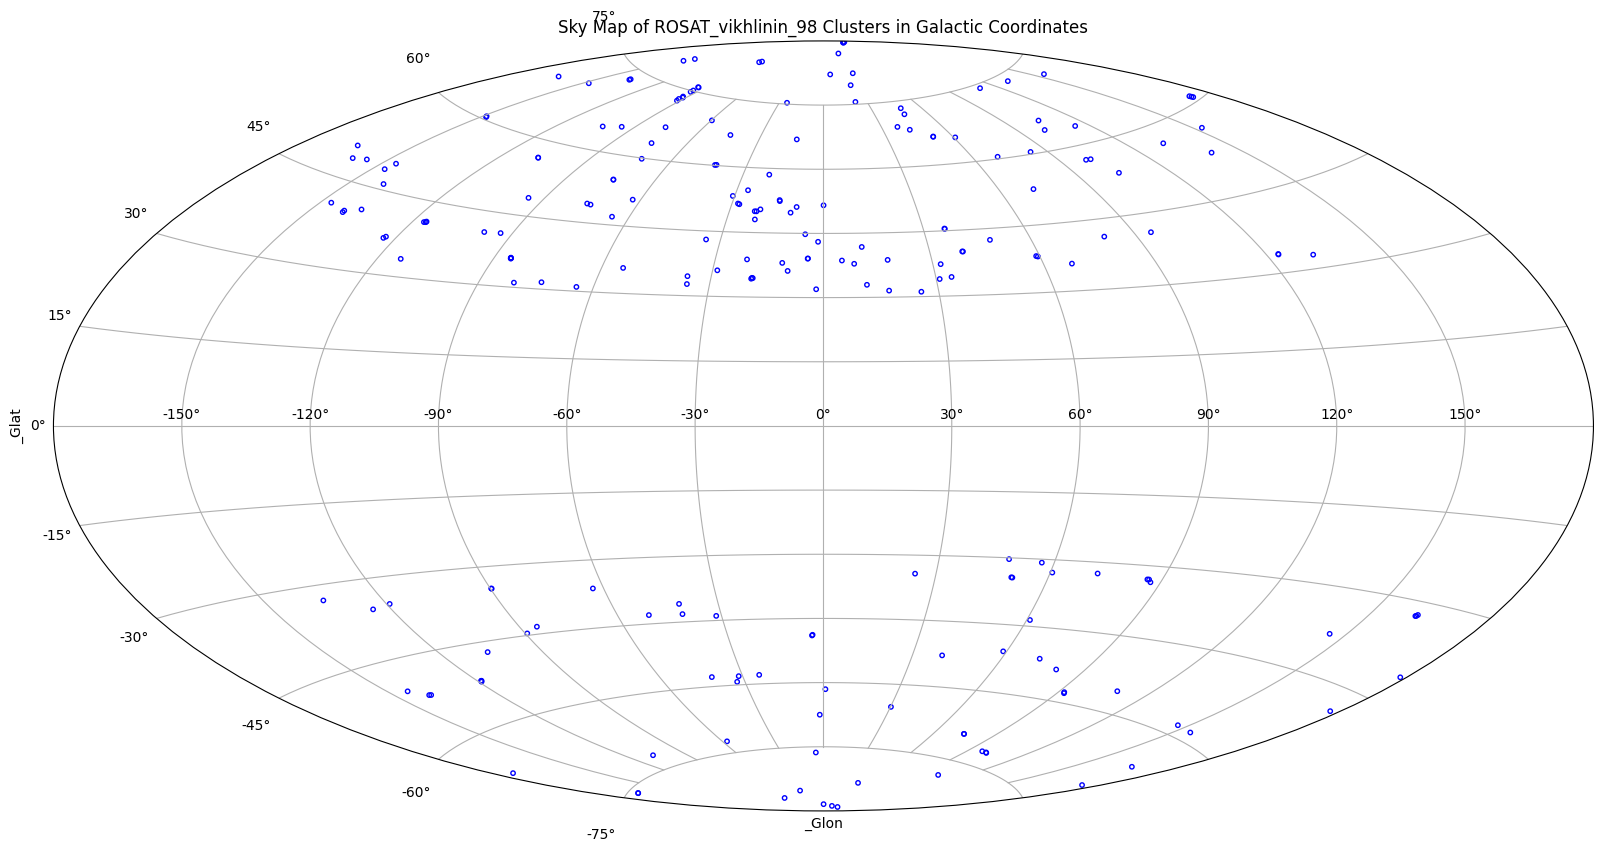

In [14]:
#To do : une fois que je me serai assuré que la projection est correcte, il faudrai labelliser les détections confirmées et infirmées

plt.figure(figsize=(20, 10))
ax_projection = plt.subplot(111, projection="aitoff")
ax_projection.scatter(X_glon_radians, X_glat_radians, s=10,edgecolors='blue',facecolors='none') #Apparemment la projection Aitoff a besoin de la coordonnée en radians

"""
# Set custom x-axis ticks using x_axis
x_ticks = np.radians(x_axis)  # Convert x_axis to radians for the Aitoff projection
ax_projection.set_xticks(x_ticks)
#ax_projection.set_xticklabels([f"{int(deg)}°" for deg in x_axis])  # Format labels as degrees

"""

ax_projection.grid(True)
ax_projection.set_xlabel("_Glon")
ax_projection.set_ylabel("_Glat")
plt.title(f"Sky Map of {name_X} Clusters in Galactic Coordinates")

# Il y a un souci dans la projection ! Si on compare à la figure 1 du papier Vikhlinin 98 (corrrespondant au dataset), il semble qu'il y a moins de points dans ce que je trace → orgine du problème ?


C:\Users\ED282972\AppData\Local\Temp\ipykernel_12172\4078710398.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


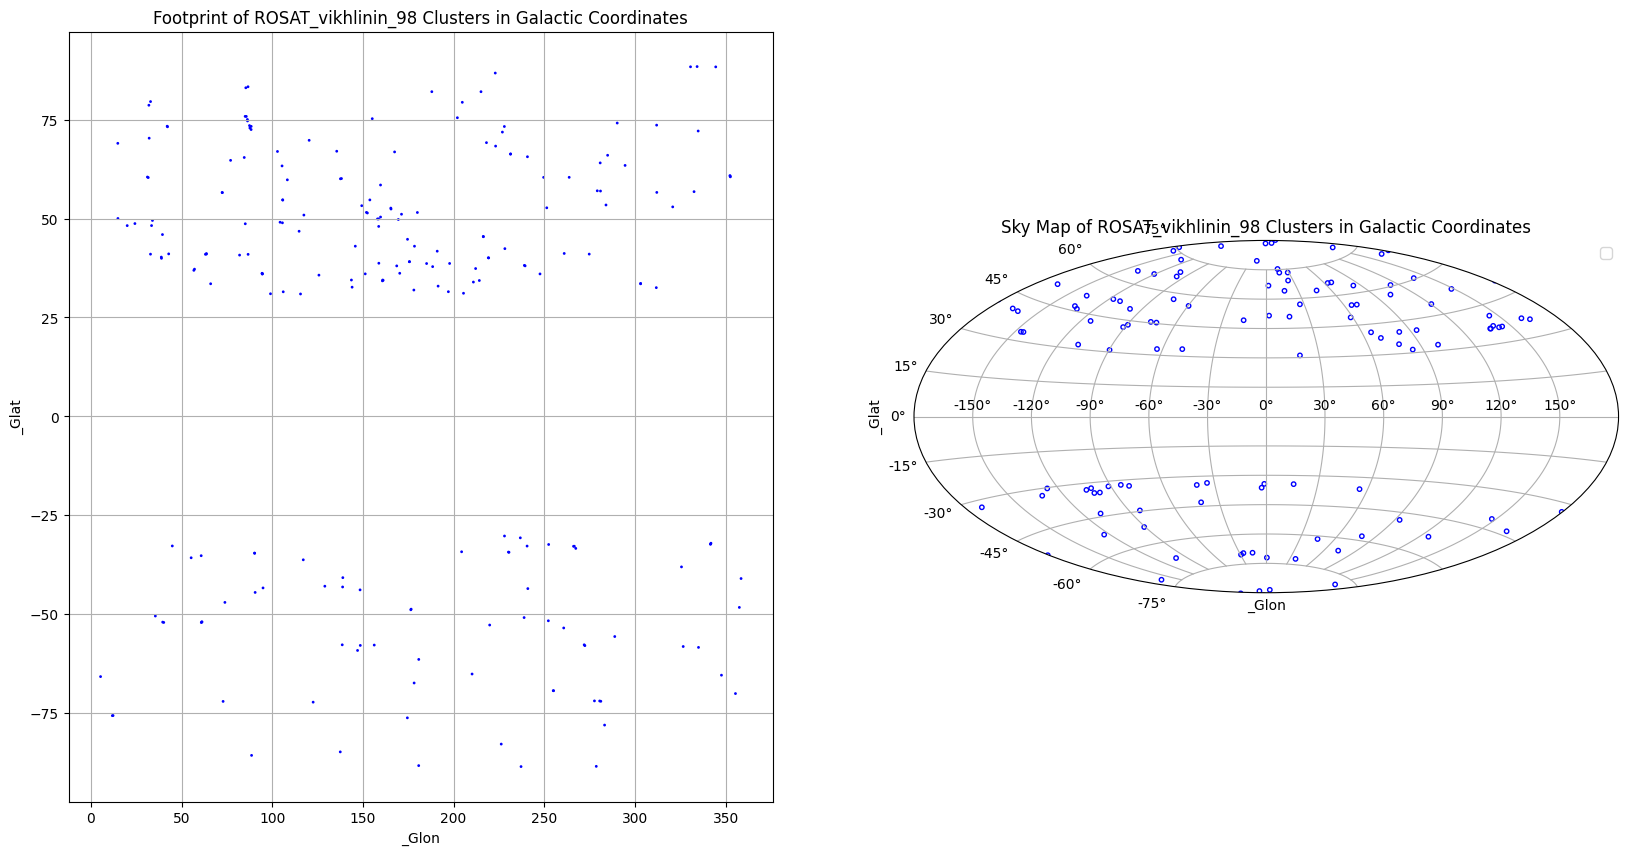

In [15]:
plt.figure(figsize=(20, 10))
ax_footprint = plt.subplot(121)
ax_footprint.scatter(X_df['_Glon'], X_df['_Glat'], s=1,edgecolors='blue',facecolors='none')
ax_footprint.grid(True)
ax_footprint.set_xlabel("_Glon")
ax_footprint.set_ylabel("_Glat")
plt.title(f"Footprint of {name_X} Clusters in Galactic Coordinates")

ax_projection = plt.subplot(122, projection="aitoff")
ax_projection.scatter(X_glon_deg, X_glat_radians, s=10,edgecolors='blue',facecolors='none') 
ax_projection.grid(True)
ax_projection.set_xlabel("_Glon")
ax_projection.set_ylabel("_Glat")
plt.title(f"Sky Map of {name_X} Clusters in Galactic Coordinates")

plt.legend()
plt.show()
# Toujours souci de projection !

    Optical

C:\Users\ED282972\AppData\Local\Temp\ipykernel_12172\898937295.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


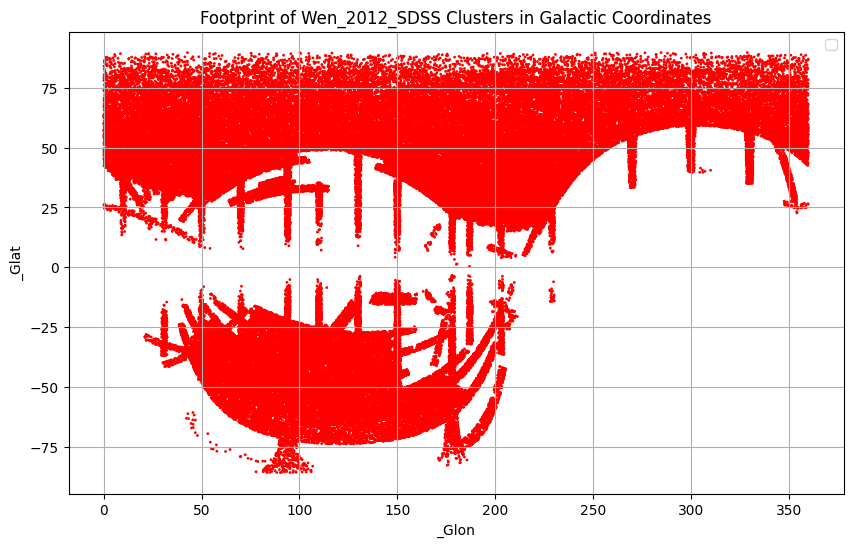

In [16]:
plt.figure(figsize=(10, 6))
ax_footprint = plt.subplot(111)
ax_footprint.scatter(opt_df['_Glon'], opt_df['_Glat'], s=1,edgecolors='red',facecolors='none') 
ax_footprint.grid(True)
ax_footprint.set_xlabel("_Glon")
ax_footprint.set_ylabel("_Glat")
plt.title(f"Footprint of {name_opt} Clusters in Galactic Coordinates")
plt.legend()
plt.show()

In [17]:
opt_glon_deg = np.array(opt_df['_Glon'] -180)
opt_glon_radians = np.radians(opt_glon_deg)

opt_glat_radians = np.radians(opt_df['_Glat'])

C:\Users\ED282972\AppData\Local\Temp\ipykernel_12172\739486070.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


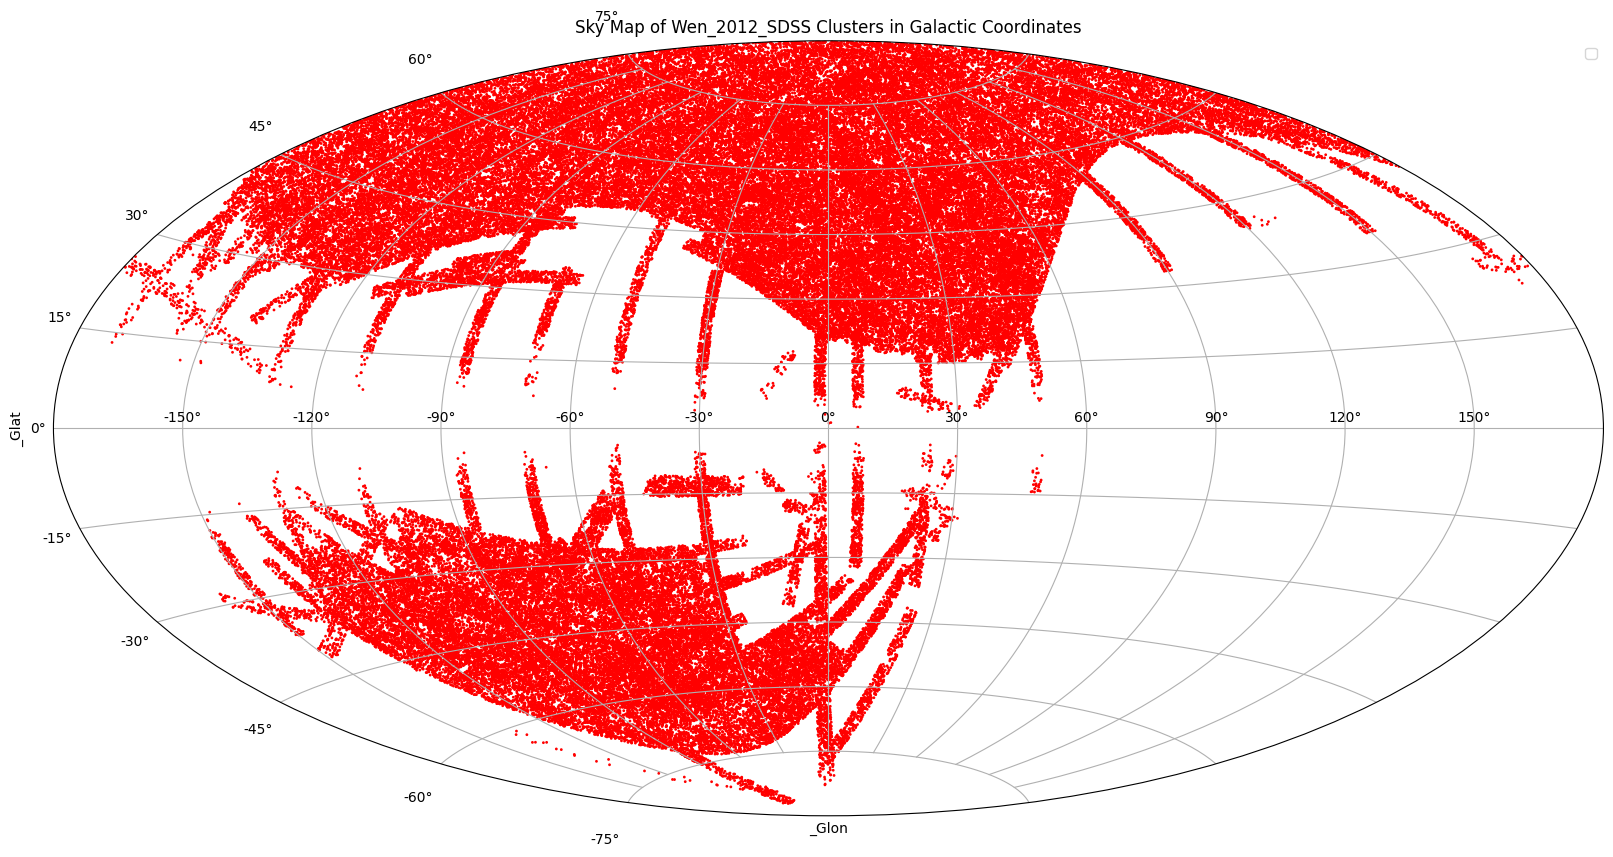

In [18]:
plt.figure(figsize=(20, 12))
ax_projection = plt.subplot(111, projection="aitoff")
ax_projection.scatter(opt_glon_radians, opt_glat_radians, s=1,edgecolors='red',facecolors='none') #Apparemment la projection Aitoff a besoin de la coordonnée en radians
ax_projection.grid(True)
ax_projection.set_xlabel("_Glon")
ax_projection.set_ylabel("_Glat")
plt.title(f"Sky Map of {name_opt} Clusters in Galactic Coordinates")
plt.legend()
plt.show()

# Sachant que la projection pour Vihklinin 98 ne fonctionne pas, ici pour Wen 2012, il y a probablement le même souci (malheureusement pas de figure dans le papier Wen 12 pour comparer).

    Superpostion of Optical and X

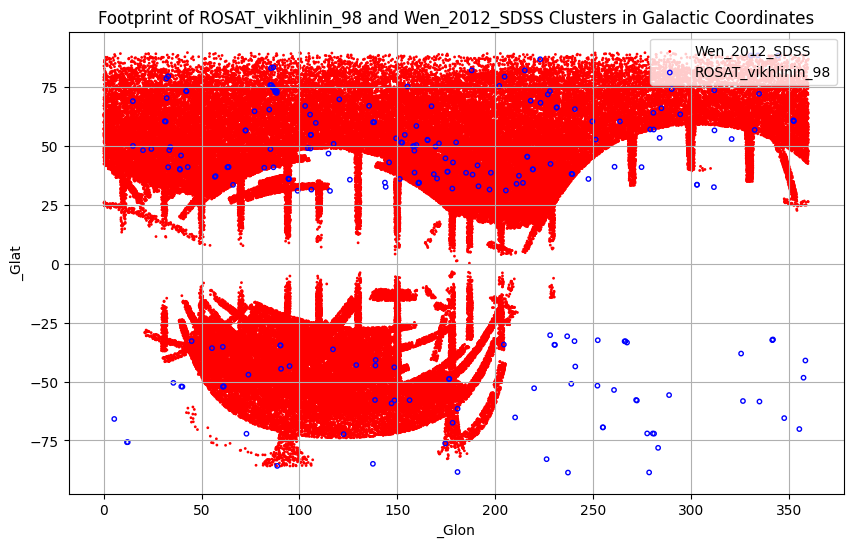

In [19]:
plt.figure(figsize=(10, 6))

ax_footprint_X = plt.subplot(111)
ax_footprint_opt = plt.subplot(111)

ax_footprint_opt.scatter(opt_df['_Glon'], opt_df['_Glat'], s=1,edgecolors='red',facecolors='none',label = name_opt)
ax_footprint_X.scatter(X_df['_Glon'], X_df['_Glat'], s=10,edgecolors='blue',facecolors='none',label = name_X)


ax_footprint_X.grid(True)
ax_footprint_X.set_xlabel("_Glon")
ax_footprint_X.set_ylabel("_Glat")

ax_footprint_opt.grid(True)
ax_footprint_opt.set_xlabel("_Glon")
ax_footprint_opt.set_ylabel("_Glat")


plt.title(f"Footprint of {name_X} and {name_opt} Clusters in Galactic Coordinates")

#plt.legend()
plt.legend(loc='upper right')
plt.show()

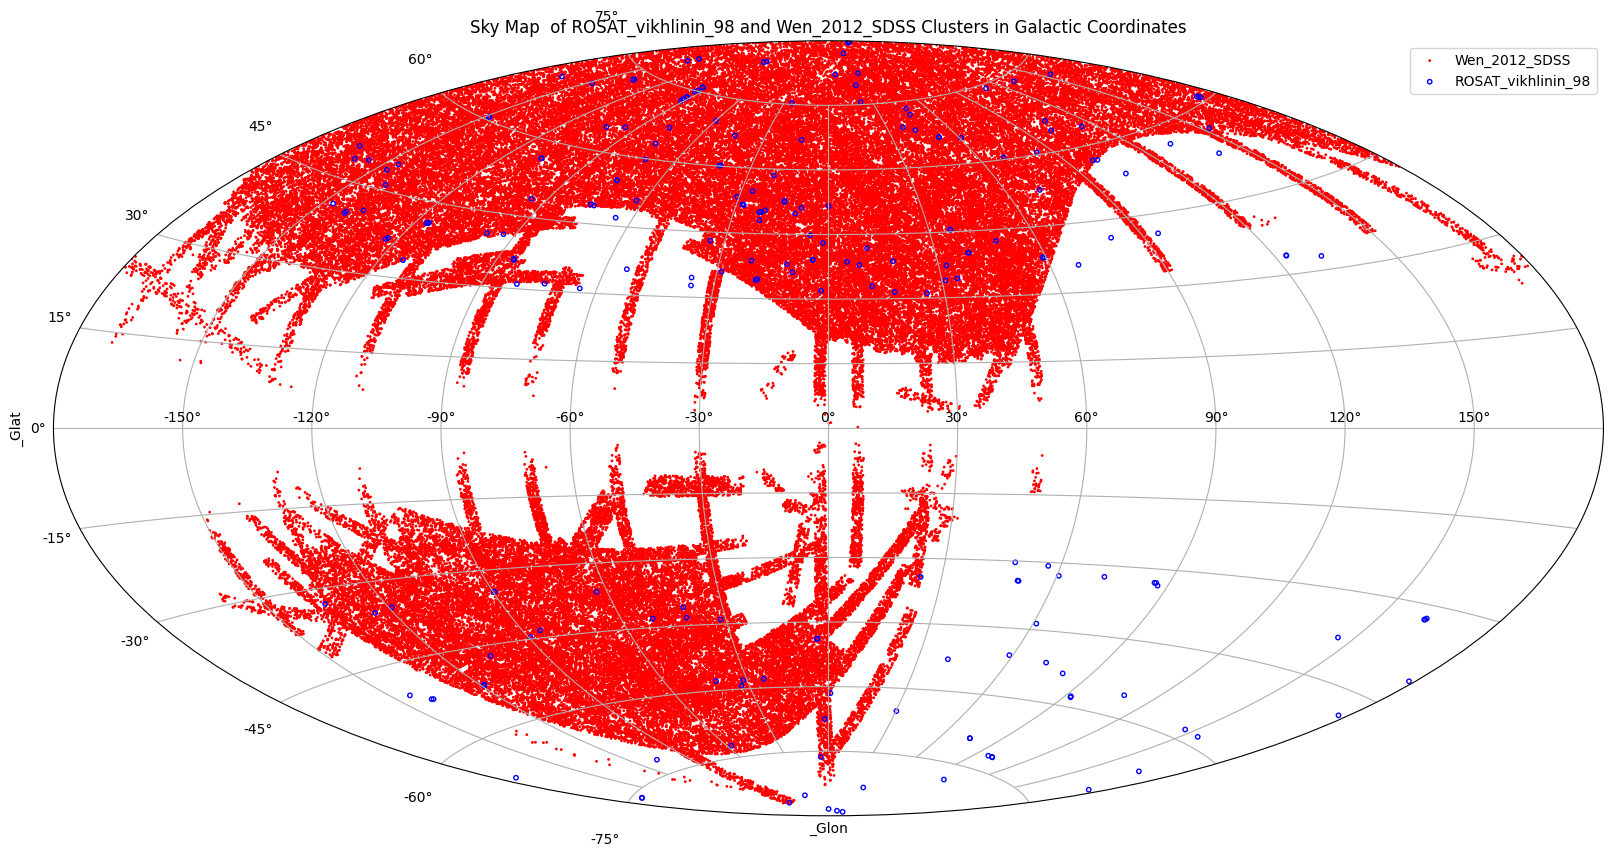

In [20]:
plt.figure(figsize=(20, 12))

ax_footprint_X = plt.subplot(111, projection ="aitoff")
ax_footprint_opt = plt.subplot(111, projection ="aitoff")

ax_footprint_opt.scatter(opt_glon_radians, opt_glat_radians, s=1,edgecolors='red',facecolors='none',label = name_opt)
ax_footprint_X.scatter(X_glon_radians, X_glat_radians, s=10,edgecolors='blue',facecolors='none',label = name_X)


ax_footprint_X.grid(True)
ax_footprint_X.set_xlabel("_Glon")
ax_footprint_X.set_ylabel("_Glat")

ax_footprint_opt.grid(True)
ax_footprint_opt.set_xlabel("_Glon")
ax_footprint_opt.set_ylabel("_Glat")


plt.title(f"Sky Map  of {name_X} and {name_opt} Clusters in Galactic Coordinates")

plt.legend(loc='upper right')
plt.show()

#Toujours le même souci dans la projection ...

## Catalogue X 

### Flux en fonction du redshift (pertinent pour Vikhlinin 98)

Text(0.5, 1.0, '"Total unabsorbed X-ray flux FX in the 0.5-2keV energy band" vs "z" for ROSAT_vikhlinin_98')

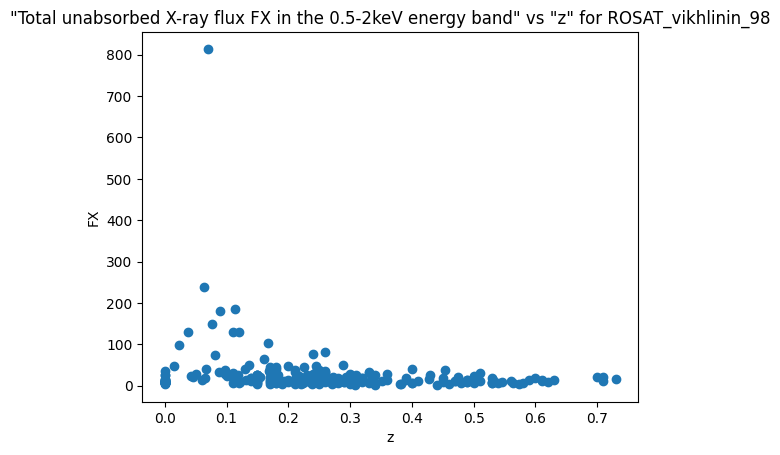

In [21]:
plt.scatter(X_df['z'],X_df['FX'])
plt.xlabel('z')
plt.ylabel('FX')
plt.title(f'"Total unabsorbed X-ray flux FX in the 0.5-2keV energy band" vs "z" for {name_X}')

#To do : Réussir à tracer la BCG magitude en fonction de z (c'est à dire reproduire la figure 5 du papier Vikhlinin 98)